In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
bbh =  ['MRNA', 'AMGN', 'IQV', 'ICLR', 'VRTX', 'GILD', 'REGN', 'ILMN', 'CRL', 'SGEN', 'BIIB', 
        'TECH', 'BNTX', 'BGNE', 'EXAS', 'ALNY', 'NVAX', 'QGEN', 'GH', 'NTRA', 'BMRN', 'INCY', 
        'TXG', 'NTLA', 'CRSP']

stocks = bbh
etfs = ['BBH']

In [3]:
prices = pd.read_csv('bbh_idna.csv', index_col=0)
prices = prices[stocks+etfs]

In [4]:
returns = prices.pct_change().dropna()

In [5]:
returns

,MRNA,AMGN,IQV,ICLR,VRTX,GILD,REGN,ILMN,CRL,SGEN,...,NVAX,QGEN,GH,NTRA,BMRN,INCY,TXG,NTLA,CRSP,BBH
2019-10-11,-0.007415,0.010670,0.007523,-0.002036,0.012866,0.011540,0.008077,0.014756,0.017583,0.012876,...,0.017857,-0.005874,0.016513,0.041304,0.012856,0.004619,0.017754,0.014266,0.004075,0.009710
2019-10-14,-0.008894,0.010408,0.002603,-0.010831,0.006844,0.008126,0.015527,0.025547,0.005935,-0.002179,...,0.028509,0.005908,0.042560,0.030491,-0.001781,0.017604,0.019473,-0.010436,-0.007576,0.011895
2019-10-15,0.028715,0.008724,0.001366,0.002702,0.014690,0.012246,-0.005304,0.005994,0.001270,0.011648,...,0.029851,0.009545,0.023372,0.026970,0.018888,0.013684,-0.031834,0.041265,0.034896,0.010921
2019-10-16,-0.012561,-0.007085,-0.011804,0.007942,-0.000284,0.000766,-0.014548,-0.008008,0.005147,0.005757,...,-0.018634,0.001455,-0.010049,-0.074452,-0.008320,-0.005094,0.050760,-0.003963,-0.005532,-0.006432
2019-10-17,0.027562,0.001722,-0.010219,-0.000704,0.009257,-0.001836,0.007248,0.002842,0.009721,0.024803,...,-0.023207,0.023239,0.042141,0.046556,-0.000589,-0.008833,0.014864,0.003537,0.004238,0.005478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-19,0.049202,0.010097,0.005889,0.008137,-0.013645,0.013276,0.006430,0.009098,-0.019690,-0.003203,...,0.006752,-0.009996,-0.023516,-0.018081,0.103111,-0.009519,0.001469,-0.040178,-0.006388,0.007925
2021-11-22,0.071689,-0.016256,-0.002536,-0.016317,-0.007546,0.018634,-0.013851,-0.005773,-0.013241,-0.040845,...,0.081366,-0.006852,0.004304,-0.039833,-0.012791,-0.018137,-0.014737,-0.036917,-0.022441,0.003672
2021-11-23,-0.022321,0.008879,-0.008299,-0.026853,0.029477,0.009433,0.008825,-0.030253,-0.012992,-0.013059,...,-0.035002,-0.004176,-0.052143,-0.035732,-0.005648,0.007420,-0.003249,-0.069687,-0.006328,-0.011286
2021-11-24,-0.010818,-0.002738,0.000339,-0.000365,-0.003265,-0.007929,-0.001756,-0.000492,0.020352,-0.003567,...,-0.003189,-0.005287,0.154591,0.005967,-0.002450,0.045918,0.025260,-0.004224,0.010490,0.002919


In [6]:
s_scores = pd.DataFrame(index=returns.index[59:], columns=stocks)
betas = pd.DataFrame(index=returns.index[59:], columns=stocks)

In [7]:
for t in returns.index[59:]:
    # prepare data
    tmp_ret = returns.loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    tmp_ret = (tmp_ret - tmp_ret.mean()) / tmp_ret.std()
    
    ou_parameters = pd.DataFrame(index=stocks, columns=['a', 'b', 'Var(zeta)', 'kappa', 'm', 
                                                      'sigma', 'sigma_eq'])
    
    for stock in tmp_ret.columns.drop(etfs):
        X = tmp_ret[etfs].values
        y = tmp_ret[stock].values
        model1 = LinearRegression().fit(X,y) 
        betas.loc[t,stock] = model1.coef_
        epsilon = y - model1.predict(X)

        # second regression
        Xk = epsilon.cumsum()
        X = Xk[:-1].reshape(-1,1)
        y = Xk[1:]
        model2 = LinearRegression().fit(X,y)
        a = model2.intercept_
        b = model2.coef_
        zeta = y - model2.predict(X)

        # OU parameters
        kappa = -np.log(b)*252
        m = a/(1-b)
        sigma = np.sqrt(np.var(zeta)*2*kappa/(1-b**2))
        sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))

        # if the speed of mean reversion is high enough, save the calculated parameters
        if kappa>252/30:
            ou_parameters.loc[stock] = [x.item() for x in [a,b,np.var(zeta),kappa,m,sigma,sigma_eq]]

    ou_parameters.dropna(axis=0, inplace=True)

    # calculate s-score
    ou_parameters['m_bar'] = (ou_parameters['a']/(1 - ou_parameters['b']) - 
                              ou_parameters['a'].mean()/(1-ou_parameters['b'].mean()))
    ou_parameters['s'] = -ou_parameters['m_bar'] / ou_parameters['sigma_eq']
    s_scores.loc[t] = ou_parameters['s']

<ipython-input-7-eae915e68ddf>:30: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))


In [8]:
s_scores

,MRNA,AMGN,IQV,ICLR,VRTX,GILD,REGN,ILMN,CRL,SGEN,...,ALNY,NVAX,QGEN,GH,NTRA,BMRN,INCY,TXG,NTLA,CRSP
2020-01-07,-1.905674,-0.400209,1.69542,0.561843,-0.782187,0.769133,0.133717,1.069811,1.660893,-1.663327,...,-0.730079,0.979529,-1.040443,0.567601,0.274086,-0.477034,-1.584572,0.445441,-0.692867,-1.058855
2020-01-08,-1.958769,-0.382884,1.668675,0.303013,-0.216506,1.131021,0.649516,1.384895,1.533391,-1.887787,...,-0.818673,0.731194,-1.065245,0.316047,0.42025,-0.330558,-1.514945,0.292432,-0.508563,-1.100984
2020-01-09,-1.601327,-0.463886,1.694705,-0.38479,-0.636741,1.031007,0.400178,1.462167,1.619095,-1.874973,...,-0.74005,0.475168,-0.99102,0.021097,0.294901,1.014996,-1.355722,0.47197,-0.671247,-1.336673
2020-01-10,-1.398959,-0.549036,1.607593,-0.334904,-0.680796,0.946737,0.058032,1.585819,2.041201,-1.707735,...,-0.564575,0.478916,-0.940781,0.234083,0.548498,1.421473,-1.335288,0.436893,-0.604197,-1.41543
2020-01-13,-1.00749,-0.682115,1.423014,-0.034778,-0.561476,1.085925,-0.155589,1.147993,2.608074,-2.273639,...,-0.682968,0.369505,-0.770485,0.455285,-0.203139,0.919206,-1.347207,1.00685,-0.814311,-1.410882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-19,-0.767519,0.576881,1.863277,-0.399348,0.839459,0.794469,1.315202,0.119581,-0.844574,0.810113,...,0.381114,0.735119,1.259294,-2.3201,-1.776018,1.818782,0.611453,-0.635179,0.097183,-1.283105
2021-11-22,-0.644052,0.259818,1.789563,-0.942396,0.697502,1.08451,1.320408,-0.24373,-1.008855,0.318383,...,0.67601,0.91398,1.198148,-1.825732,-1.441573,2.130485,0.428059,-0.466049,-0.086613,-1.342259
2021-11-23,-0.5617,0.761493,1.641951,-1.295143,1.45472,1.551839,1.313803,-0.739237,-0.846339,0.164004,...,0.646016,0.942252,1.205524,-1.493954,-1.459305,2.103113,0.733353,-0.11741,-1.079888,-1.448602
2021-11-24,-0.801532,0.561815,1.209284,-1.692386,1.075663,1.295266,1.221389,-0.75285,-0.786929,-0.297926,...,0.445267,0.880302,0.795073,0.102391,-1.601189,1.840007,1.489263,0.015489,-0.791756,-1.013389


<AxesSubplot:>

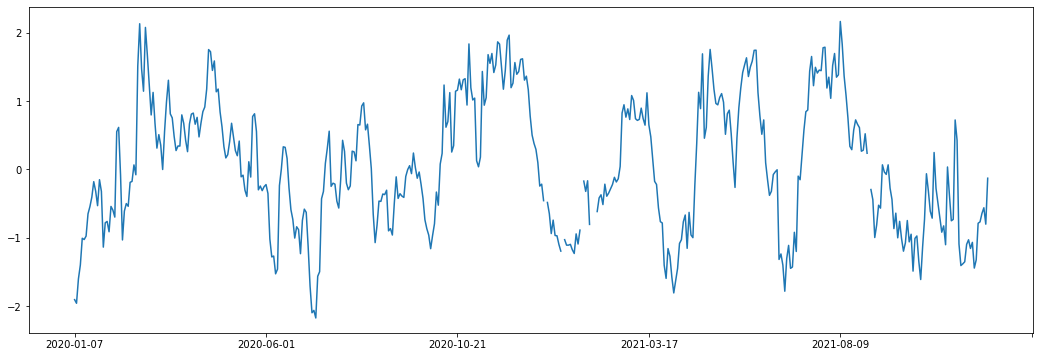

In [9]:
s_scores['MRNA'].plot(figsize=(18,6))

In [10]:
betas

,MRNA,AMGN,IQV,ICLR,VRTX,GILD,REGN,ILMN,CRL,SGEN,...,ALNY,NVAX,QGEN,GH,NTRA,BMRN,INCY,TXG,NTLA,CRSP
2020-01-07,[-0.015628004470514087],[0.6772869873618199],[0.3940107181348936],[0.30353906611393305],[0.6559067669371216],[0.5411280209494415],[0.48456935260210593],[0.44593290194957],[0.43686945991963505],[0.29079385007009384],...,[0.35248194674847794],[0.10403592679030392],[0.28680830029299687],[0.5867469129738717],[0.380607559599914],[0.3752961093626658],[0.4935402896041148],[0.18920793119515875],[0.42504882408452627],[0.38534323614855437]
2020-01-08,[-0.009726295685518362],[0.6713309082699713],[0.3914675124632305],[0.30964488210267005],[0.6381324888452767],[0.5358609594456455],[0.4816958443369568],[0.4406189742378253],[0.4275874584513563],[0.28717584879257413],...,[0.3479391695674338],[0.09261200685859101],[0.29313977583967266],[0.5748362881379578],[0.36709910642387406],[0.36995211111453935],[0.49052404709248804],[0.18533428289841086],[0.42328717821499856],[0.3902075557952221]
2020-01-09,[0.01130853101868978],[0.6561383553440131],[0.40304379105431015],[0.30978599425307685],[0.6162640959418715],[0.5236906694346781],[0.4661880364842286],[0.42745686234746233],[0.43803429614524886],[0.29138453654998864],...,[0.36269695214365516],[0.05140608852358721],[0.3055854031243758],[0.5353602175164676],[0.3351240974590387],[0.4136694135387695],[0.49278789755633723],[0.1903568233353441],[0.4309972307933225],[0.38476867985975316]
2020-01-10,[-0.013589974054010634],[0.6550751187339224],[0.40683366709044394],[0.31073444262600575],[0.6153411142879058],[0.5214970642929684],[0.4844266612114773],[0.42343323648579123],[0.4389907053454591],[0.28850162441021016],...,[0.3537759285645714],[0.04548788575797884],[0.30662676526369725],[0.5273125044882772],[0.3249034384933515],[0.391027110955778],[0.492673960905454],[0.19914227795651335],[0.4260997093187184],[0.3859603425583519]
2020-01-13,[-0.09247163831309993],[0.6503464155954329],[0.4002875593440105],[0.3050586337784567],[0.6222289565195456],[0.5332585974367634],[0.4744295245870222],[0.47608815518744557],[0.40418074371689866],[0.3681745398076946],...,[0.4077741867429039],[0.03111719410287626],[0.2766773397275532],[0.5170147567348774],[0.2833842398879759],[0.4432275413132034],[0.44593603696154704],[0.16910769047209753],[0.48263682169377864],[0.38485107339684393]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-19,[0.7712430383459004],[0.22797787223949206],[0.5638839003674984],[0.5129264071201267],[0.18978666417191273],[0.38930840423669655],[0.6619559286277696],[0.6319670730480599],[0.31175122694736773],[0.11678744985238788],...,[0.06482857588874424],[0.6093957042707262],[0.561154589857602],[0.5930549573782554],[0.4081624920946255],[0.26639885757872556],[0.16019603984022346],[0.2961340117871878],[0.4847450287869389],[0.557992487466906]
2021-11-22,[0.769088097923458],[0.2155086032025808],[0.5617214952714825],[0.4984183191002906],[0.1873073860762582],[0.3915047086908081],[0.6526948476403068],[0.6317628597851193],[0.30687347231657036],[0.09568697642479262],...,[0.07216780714572031],[0.6083334692362076],[0.5613215607145658],[0.5973839400321114],[0.3959840463377239],[0.2745891590499267],[0.1545706826221779],[0.29467058364851983],[0.47911610058585163],[0.5551648169202771]
2021-11-23,[0.7769684508382806],[0.19679345014218855],[0.5631590954394432],[0.503616870245525],[0.14800862469158155],[0.37259924645787623],[0.6409082041609315],[0.646704093919878],[0.30625325052305846],[0.10040906143063726],...,[0.07158625660006128],[0.609653038275691],[0.5597697419183707],[0.6042977109990896],[0.40138444781399063],[0.2787744486669074],[0.14488953787836623],[0.2880199131893612],[0.49915884059254517],[0.5607660230280582]
2021-11-24,[0.774733444211899],[0.19370967989345417],[0.5661106220158975],[0.5034095548082653],[0.14532627998758674],[0.365338172097538],[0.6414974409049087],[0.6466738081023448],[0.30982608882297924],[0.10041344727136284],...,[0.07470294554603861],[0.608110431529791

In [11]:
# calculate positions
algo_pos = pd.DataFrame(index=s_scores.index[1:], columns=stocks)

for s in stocks:
    positions = pd.DataFrame(index=s_scores.index, columns=[s])
    pos = 0
    for t in s_scores.index:
        score = s_scores.loc[t][s]
        if score>1.25:
            positions.loc[t][s] = -1 # open short
            pos = -1
        elif score<-1.25:
            positions.loc[t][s] = 1 # open long
            pos = 1
        elif score<0.75 and pos==-1: 
            positions.loc[t][s] = 0 # close short
            pos = 0
        elif score>-0.5 and pos==1:
            positions.loc[t][s] = 0 # close long
            pos = 0
        else:
            positions.loc[t][s] = pos # carry forward current position

    algo_pos[s] = positions

In [12]:
# calculate weights (allocate equal amount of capital to long\short positions)
algo_weights = pd.DataFrame(index=algo_pos.index, columns=stocks)

for t in algo_pos.index:
    tmp = algo_pos.loc[t]
    tmp[tmp>0] /= sum(tmp>0) # equal weights among long positions
    tmp[tmp<0] /= sum(tmp<0) # equal weights among short positions
    algo_weights.loc[t] = tmp

In [13]:
# calculate positions in ETFs
algo_weights[etfs] = -np.stack((betas.iloc[1:,:]*algo_weights).sum(axis=1).values)

In [14]:
# calculate returns
ret = (returns.iloc[60:] * algo_weights.shift()).sum(axis=1) / (abs(algo_weights.shift()).sum(axis=1)/2)
cumret = np.nancumprod(ret+1)

In [15]:
# calculate returns of SPY and BBH for comparison
spy = pd.read_csv('spy_ohlc.csv', index_col=0)
spy_returns = spy['5. adjusted close'].pct_change()
spy_returns = spy_returns.loc[returns.index]
spy_cumret = np.nancumprod(spy_returns.iloc[60:]+1)
bbh_cumret = np.nancumprod(returns.iloc[60:]['BBH']+1)

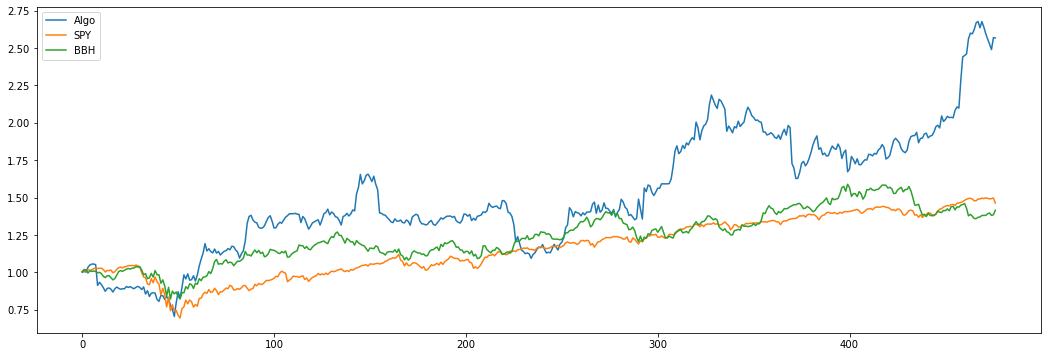

In [16]:
plt.figure(figsize=(18,6))
plt.plot(cumret, label='Algo')
plt.plot(spy_cumret, label='SPY')
plt.plot(bbh_cumret, label='BBH')
plt.legend()

In [17]:
# fraction of returns to pay transaction costs for
tc_frac = abs(algo_pos.shift().diff()).sum(axis=1)/abs(algo_pos.shift()).sum(axis=1)
# assume two-way transaction cost of 0.1%
ret_tc = ret - 0.0005*2*tc_frac # multiply by 2 since we use 2x capital
cumret_tc = np.nancumprod(1+ret_tc)

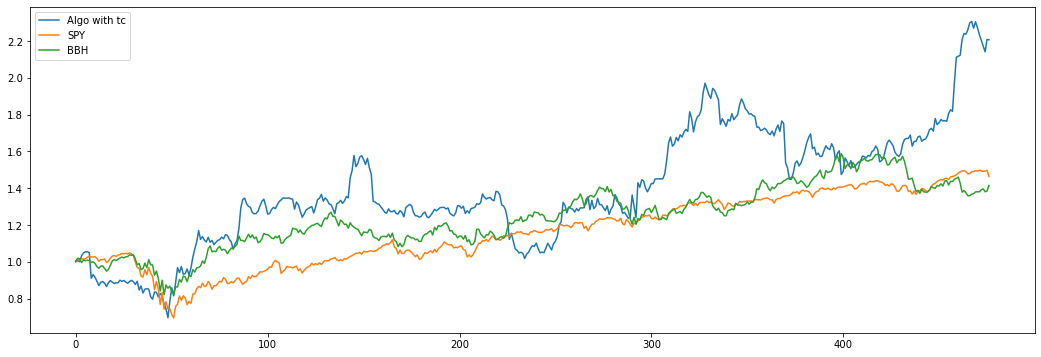

In [18]:
plt.figure(figsize=(18,6))
plt.plot(cumret_tc, label='Algo with tc')
plt.plot(spy_cumret, label='SPY')
plt.plot(bbh_cumret, label='BBH')
plt.legend()

In [19]:
def calculate_metrics(cumret):
    '''
    calculate performance metrics from cumulative returns
    '''
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(252/len(cumret)) - 1
    rets = pd.DataFrame(cumret).pct_change()
    sharpe = np.sqrt(252) * np.nanmean(rets) / np.nanstd(rets)
    
    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)
    
    return total_return, apr, sharpe, maxDD, maxDDD

In [20]:
results = pd.DataFrame(index=['SPY', 'BBH', 'Algo', 'Algo_with_tc'], columns=['total_return', 'apr', 'Sharpe', 
                                                                       'maxDD', 'maxDDD'])
results.loc['SPY'] = calculate_metrics(spy_cumret)
results.loc['BBH'] = calculate_metrics(bbh_cumret)
results.loc['Algo'] = calculate_metrics(cumret)
results.loc['Algo_with_tc'] = calculate_metrics(cumret_tc)
results

,total_return,apr,Sharpe,maxDD,maxDDD
SPY,0.455753,0.219438,0.902447,-0.336999,119.0
BBH,0.408214,0.198235,0.796385,-0.208774,105.0
Algo,1.566918,0.645482,1.343679,-0.339818,158.0
Algo_with_tc,1.206587,0.519107,1.163813,-0.354668,163.0


In [21]:
total_returns = []

for _ in range(10000):
    p = np.array(5*[0.2] + 4*[-0.25] + 17*[0])
    mc_weights = []

    for i in range(len(algo_pos)):
        mc_weights.append(np.random.permutation(p))
    
    mc_weights = pd.DataFrame(mc_weights, index=algo_weights.index, columns=algo_weights.columns)
    
    # calculate returns
    mc_ret = (returns.iloc[60:] * mc_weights.shift()).sum(axis=1) / (abs(mc_weights.shift()).sum(axis=1)/2)
    mc_cumret = np.nancumprod(mc_ret+1)
    tot_ret = (mc_cumret[-1] - mc_cumret[0])/mc_cumret[0]
    total_returns.append(tot_ret)

In [22]:
total_returns = np.array(total_returns)
(total_returns>1.56).sum()/10000

0.0128

# XLF ETF and its constituents

In [23]:
xlf =  ['BRK.B', 'JPM', 'BAC', 'WFC', 'MS', 'C', 'GS', 'BLK', 'SCHW', 'SPGI', 'AXP', 'PNC', 'MMC', 'TFC', 'CB']
stocks = list(set(xlf))
etfs = ['XLF']
symbols = stocks + etfs
prices = pd.read_csv('xlf.csv', index_col=0)
prices = prices[stocks+etfs]
returns = prices.pct_change().dropna()
returns = returns.loc['2019-10-11':]

In [24]:
s_scores = pd.DataFrame(index=returns.index[59:], columns=stocks)
betas = pd.DataFrame(index=returns.index[59:], columns=stocks)

for t in returns.index[59:]:
    # prepare data
    tmp_ret = returns.loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    tmp_ret = (tmp_ret - tmp_ret.mean()) / tmp_ret.std()
    
    ou_parameters = pd.DataFrame(index=stocks, columns=['a', 'b', 'Var(zeta)', 'kappa', 'm', 
                                                      'sigma', 'sigma_eq'])
    
    for stock in tmp_ret.columns.drop(etfs):
        X = tmp_ret[etfs].values
        y = tmp_ret[stock].values
        model1 = LinearRegression().fit(X,y) 
        betas.loc[t,stock] = model1.coef_
        epsilon = y - model1.predict(X)

        # second regression
        Xk = epsilon.cumsum()
        X = Xk[:-1].reshape(-1,1)
        y = Xk[1:]
        model2 = LinearRegression().fit(X,y)
        a = model2.intercept_
        b = model2.coef_
        zeta = y - model2.predict(X)

        # OU parameters
        kappa = -np.log(b)*252
        m = a/(1-b)
        sigma = np.sqrt(np.var(zeta)*2*kappa/(1-b**2))
        sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))

        # if the speed of mean reversion is high enough, save the calculated parameters
        if kappa>252/30:
            ou_parameters.loc[stock] = [x.item() for x in [a,b,np.var(zeta),kappa,m,sigma,sigma_eq]]

    ou_parameters.dropna(axis=0, inplace=True)

    # calculate s-score
    ou_parameters['m_bar'] = (ou_parameters['a']/(1 - ou_parameters['b']) - 
                              ou_parameters['a'].mean()/(1-ou_parameters['b'].mean()))
    ou_parameters['s'] = -ou_parameters['m_bar'] / ou_parameters['sigma_eq']
    s_scores.loc[t] = ou_parameters['s']

<ipython-input-24-02d6fd49f549>:33: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))


In [25]:
# calculate positions
algo_pos = pd.DataFrame(index=s_scores.index[1:], columns=stocks)

for s in stocks:
    positions = pd.DataFrame(index=s_scores.index, columns=[s])
    pos = 0
    for t in s_scores.index:
        score = s_scores.loc[t][s]
        if score>1.25:
            positions.loc[t][s] = -1 # open short
            pos = -1
        elif score<-1.25:
            positions.loc[t][s] = 1 # open long
            pos = 1
        elif score<0.75 and pos==-1: 
            positions.loc[t][s] = 0 # close short
            pos = 0
        elif score>-0.5 and pos==1:
            positions.loc[t][s] = 0 # close long
            pos = 0
        else:
            positions.loc[t][s] = pos # carry forward current position

    algo_pos[s] = positions
    
# calculate weights (allocate equal amount of capital to long\short positions)
algo_weights = pd.DataFrame(index=algo_pos.index, columns=stocks)

for t in algo_pos.index:
    tmp = algo_pos.loc[t]
    tmp[tmp>0] /= sum(tmp>0) # equal weights among long positions
    tmp[tmp<0] /= sum(tmp<0) # equal weights among short positions
    algo_weights.loc[t] = tmp
    
# calculate positions in ETFs
algo_weights[etfs] = -np.stack((betas.iloc[1:,:]*algo_weights).sum(axis=1).values)

# calculate returns
ret = (returns.iloc[60:] * algo_weights.shift()).sum(axis=1) / (abs(algo_weights.shift()).sum(axis=1)/2)
cumret = np.nancumprod(ret+1)

# XLF returns
xlf_cumret = np.nancumprod(returns.iloc[60:]['XLF']+1)

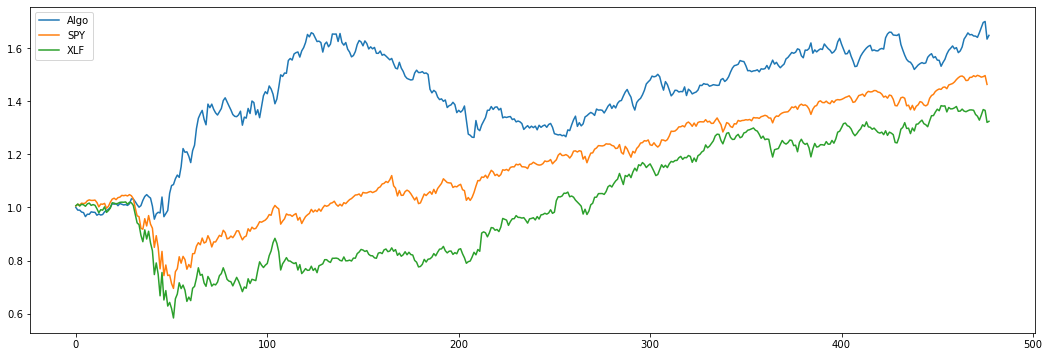

In [26]:
plt.figure(figsize=(18,6))
plt.plot(cumret, label='Algo')
plt.plot(spy_cumret, label='SPY')
plt.plot(xlf_cumret, label='XLF')
plt.legend()

In [27]:
# fraction of returns to pay transaction costs for
tc_frac = abs(algo_pos.shift().diff()).sum(axis=1)/abs(algo_pos.shift()).sum(axis=1)
# assume two-way transaction cost of 0.1%
ret_tc = ret - 0.0005*2*tc_frac # multiply by 2 since we use 2x capital
cumret_tc = np.nancumprod(1+ret_tc)

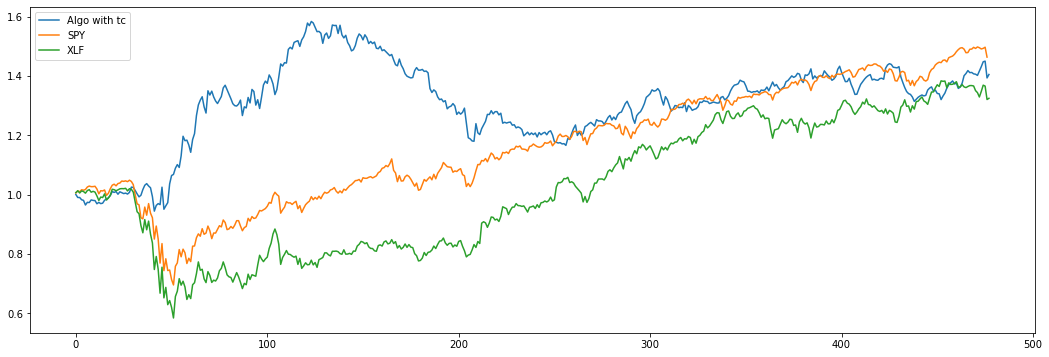

In [28]:
plt.figure(figsize=(18,6))
plt.plot(cumret_tc, label='Algo with tc')
plt.plot(spy_cumret, label='SPY')
plt.plot(xlf_cumret, label='XLF')
plt.legend()

In [29]:
results = pd.DataFrame(index=['SPY', 'XLF', 'Algo', 'Algo_with_tc'], columns=['total_return', 'apr', 'Sharpe', 
                                                                       'maxDD', 'maxDDD'])
results.loc['SPY'] = calculate_metrics(spy_cumret)
results.loc['XLF'] = calculate_metrics(xlf_cumret)
results.loc['Algo'] = calculate_metrics(cumret)
results.loc['Algo_with_tc'] = calculate_metrics(cumret_tc)
results

,total_return,apr,Sharpe,maxDD,maxDDD
SPY,0.455753,0.219438,0.902447,-0.336999,119.0
XLF,0.315936,0.15574,0.588351,-0.428319,224.0
Algo,0.648378,0.301462,1.311395,-0.237886,301.0
Algo_with_tc,0.404893,0.196291,0.92618,-0.263909,354.0


In [30]:
# avg number of long positions
(algo_weights>0).sum(axis=1).mean()

3.3430962343096233

In [31]:
# avg number of short positions
(algo_weights<0).sum(axis=1).mean()

3.0502092050209204

In [32]:
total_returns = []

for _ in range(10000):
    p = np.array(3*[0.333] + 3*[-0.333] + 10*[0])
    mc_weights = []

    for i in range(len(algo_pos)):
        mc_weights.append(np.random.permutation(p))
    
    mc_weights = pd.DataFrame(mc_weights, index=algo_weights.index, columns=algo_weights.columns)
    
    # calculate returns
    mc_ret = (returns.iloc[60:] * mc_weights.shift()).sum(axis=1) / (abs(mc_weights.shift()).sum(axis=1)/2)
    mc_cumret = np.nancumprod(mc_ret+1)
    tot_ret = (mc_cumret[-1] - mc_cumret[0])/mc_cumret[0]
    total_returns.append(tot_ret)

In [33]:
total_returns = np.array(total_returns)
(total_returns>0.64).sum()/10000

0.0174